In [258]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [259]:
# loading dataset
df = pd.read_csv(r'C:\Users\hp\Documents\Datasets\LGR\loan_data.csv')

In [260]:
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [261]:
df.shape

(45000, 14)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [263]:
# checking for duplicates
df.duplicated().sum()

0

<Axes: xlabel='loan_status'>

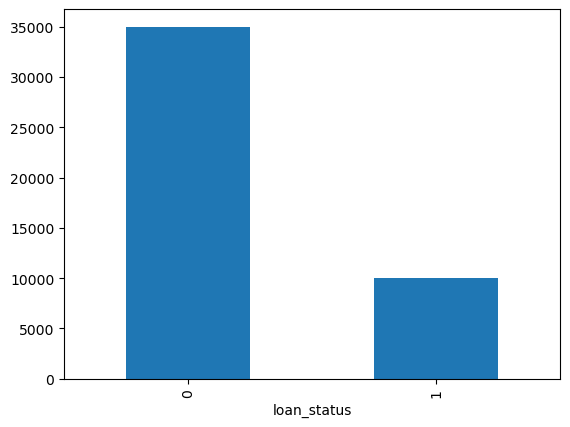

In [264]:
# Checking for imbalance
df['loan_status'].value_counts().plot(kind='bar')

There is a ~22%-78% split of defaults to non-defaults, which is unbalanced but not extreme. So there will be no class rebalancing.

# Numerical Feature Analysis

In [265]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


There is a noticable outlier in the `person_age` column.

In [266]:
# Removing age outliers
df = df[df['person_age'] <= 100]

<Axes: xlabel='person_income'>

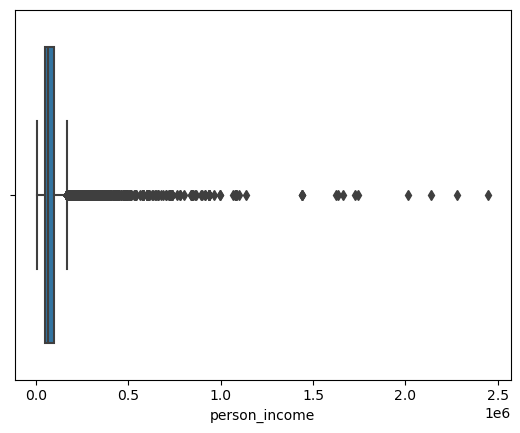

In [267]:
# Detecting outliers using boxplots
sns.boxplot(x=df['person_income'])

The `person_income` column has a wide spread of datapoints, an IQR method of outlier removal on this column and others similar in spread would be too agressive on the dataframe. 

In [268]:
df.shape

(44993, 14)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44993 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44993 non-null  float64
 1   person_gender                   44993 non-null  object 
 2   person_education                44993 non-null  object 
 3   person_income                   44993 non-null  float64
 4   person_emp_exp                  44993 non-null  int64  
 5   person_home_ownership           44993 non-null  object 
 6   loan_amnt                       44993 non-null  float64
 7   loan_intent                     44993 non-null  object 
 8   loan_int_rate                   44993 non-null  float64
 9   loan_percent_income             44993 non-null  float64
 10  cb_person_cred_hist_length      44993 non-null  float64
 11  credit_score                    44993 non-null  int64  
 12  previous_loan_defaults_on_file  44993

In [270]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44993.000000,4.499300e+04,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000
mean,27.748428,7.990845e+04,5.394528,9583.176761,11.006448,0.139736,5.866557,632.585713,0.222257
std,5.909737,6.332213e+04,5.927159,6314.802655,2.978985,0.087207,3.877167,50.402411,0.415767
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.719500e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.577800e+04,8.000000,12237.000000,12.990000,0.190000,8.000000,670.000000,0.000000
max,94.000000,2.448661e+06,76.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


<Axes: xlabel='person_age'>

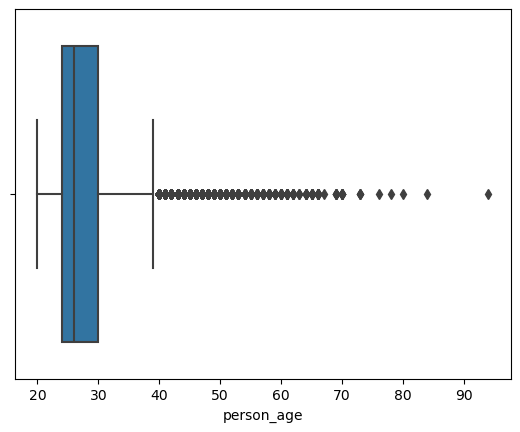

In [271]:
# Detecting outliers using boxplots
sns.boxplot(x=df['person_age'])

<Axes: xlabel='person_income'>

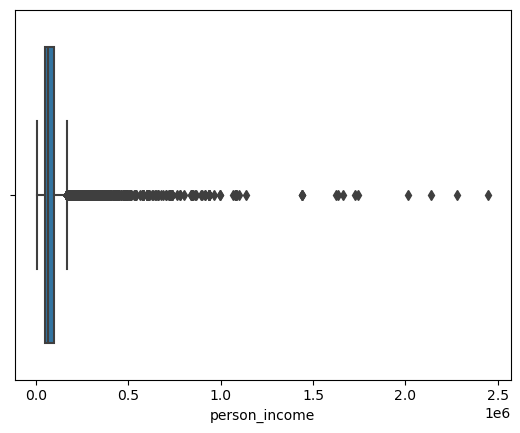

In [272]:
sns.boxplot(x=df['person_income'])

<Axes: xlabel='person_emp_exp'>

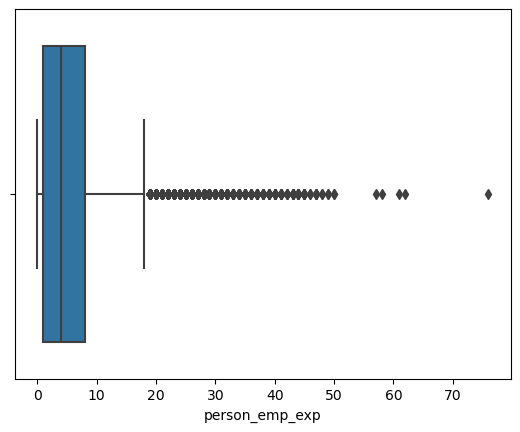

In [273]:
sns.boxplot(x=df['person_emp_exp'])

<Axes: xlabel='loan_amnt'>

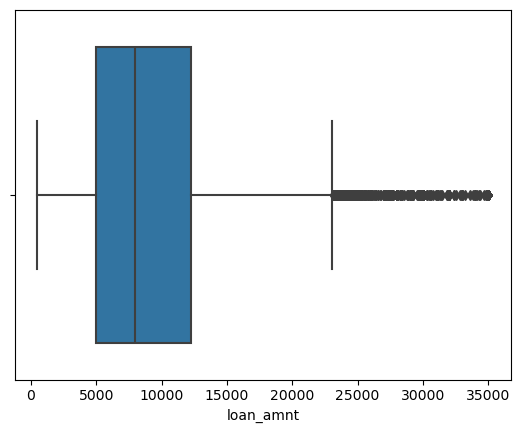

In [274]:
sns.boxplot(x=df['loan_amnt'])

<Axes: xlabel='loan_int_rate'>

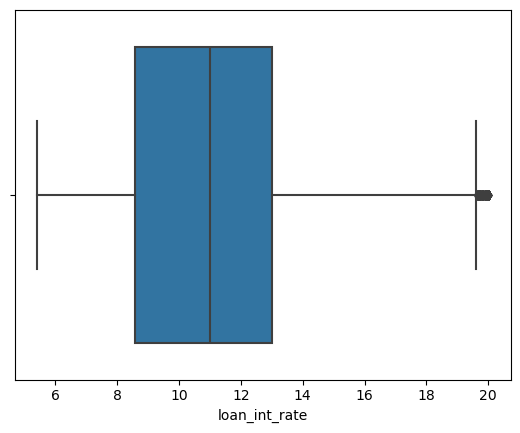

In [275]:
sns.boxplot(x=df['loan_int_rate'])

<Axes: xlabel='loan_percent_income'>

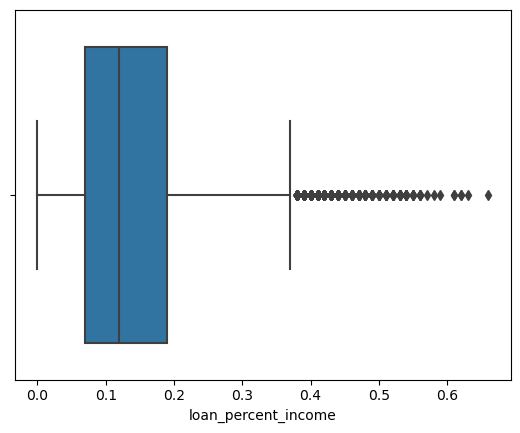

In [276]:
sns.boxplot(x=df['loan_percent_income'])

<Axes: xlabel='cb_person_cred_hist_length'>

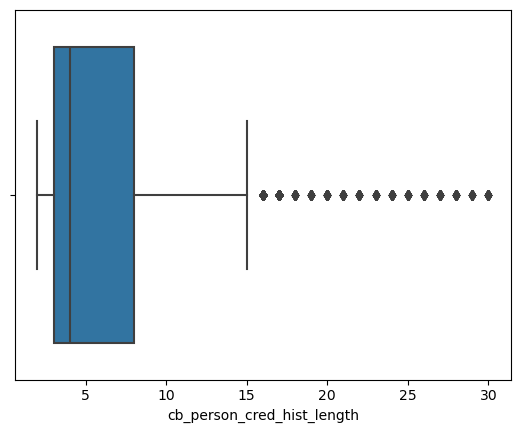

In [277]:
sns.boxplot(x=df['cb_person_cred_hist_length'])

<Axes: xlabel='credit_score'>

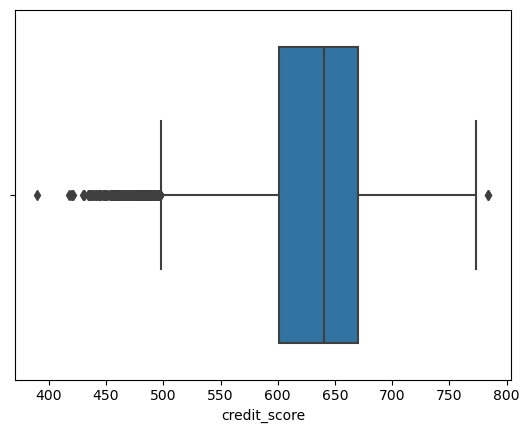

In [278]:
sns.boxplot(x=df['credit_score'])

<Axes: xlabel='loan_percent_income'>

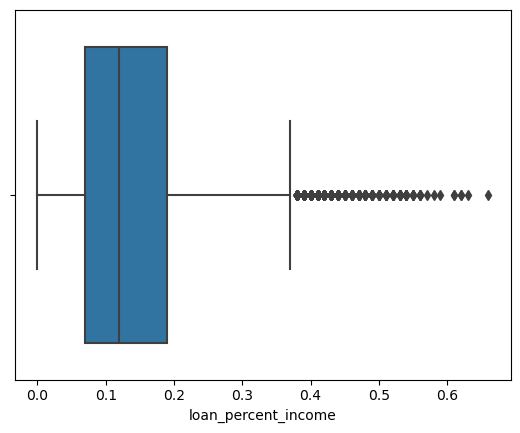

In [279]:
sns.boxplot(x=df['loan_percent_income'])

<Axes: >

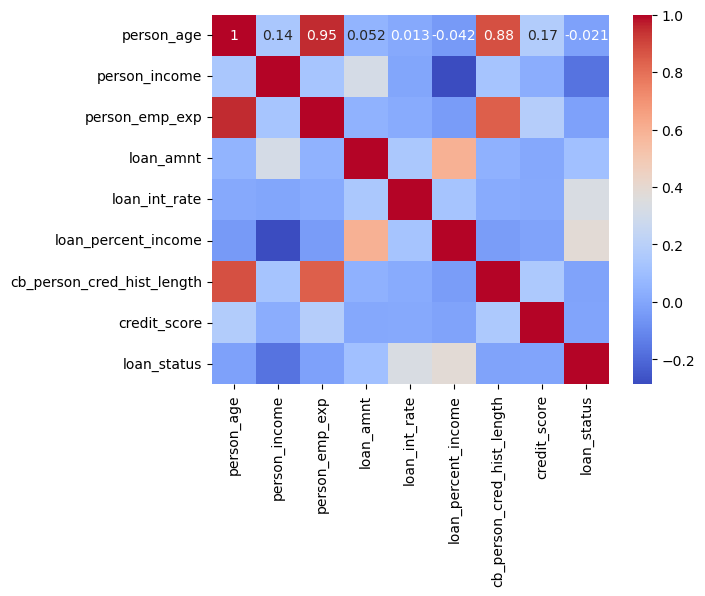

In [280]:
num = df.select_dtypes('number')
sns.heatmap(num.corr(), annot=True, cmap= 'coolwarm')

# Categorical Feature Analysis
Countplots for categorical variables

In [281]:
cat=df.select_dtypes('object')
cat.head()

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No


In [282]:
#
df['loan_status'] = df['loan_status'].map({1:'default', 0:'non-default'})

<Axes: xlabel='person_gender', ylabel='count'>

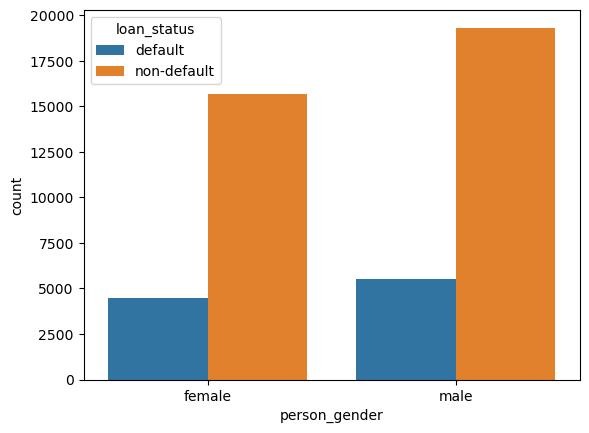

In [283]:
# Countplot for defaulters among gender group
sns.countplot(x='person_gender', hue='loan_status', data=df)

In [284]:
# Compating default rate between genders
ct = pd.crosstab(df['person_gender'], df['loan_status']) # a cross-tab of gender and loan status
ct['default_rate'] = ct['default'] / (ct['non-default'] + ct['default']) * 100 # computing default rates
ct

loan_status,default,non-default,default_rate
person_gender,,,
female,4485,15672,22.250335
male,5515,19321,22.205669


The chart shows a significant gender imbalance in the dataframe with far more count of males than female individuals. 
There is slightly a higher count of male defaulters `5,515`, with `4,485` female defaulters.
However, despite the significant gender imbalance, there exists a similar default rate among both gender group, with approximately `22.2%` of both gender group defaulting.

<Axes: xlabel='person_education', ylabel='count'>

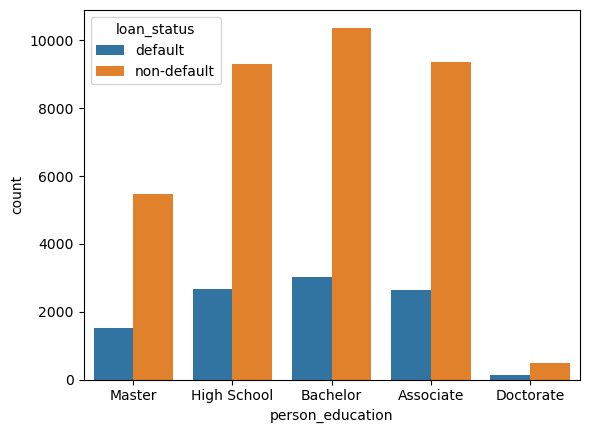

In [285]:
# Countplot of defaulters among education group
sns.countplot(x='person_education', hue='loan_status', data=df)

In [286]:
ct = pd.crosstab(df['person_education'], df['loan_status'])
ct['default_rate'] = ct['default'] / (ct['non-default'] + ct['default']) * 100
ct

loan_status,default,non-default,default_rate
person_education,,,
Associate,2650,9376,22.035590
Bachelor,3018,10378,22.529113
Doctorate,142,479,22.866345
High School,2671,9299,22.314119
Master,1519,5461,21.762178


The chart shows most common education level is `Bachelor`, followed by `Associate` and `High School` with similar counts, then `Master` and `Doctorate`. 
The count of defaulters from each group also follows similar pattern as overall count of education level with `Bachelor` having the most defaulters; `3018` and `Doctorate` with the least at `142`.
Here also exists a similar default rate among the education levels with a default rate of ~`22%`

<Axes: xlabel='person_home_ownership', ylabel='count'>

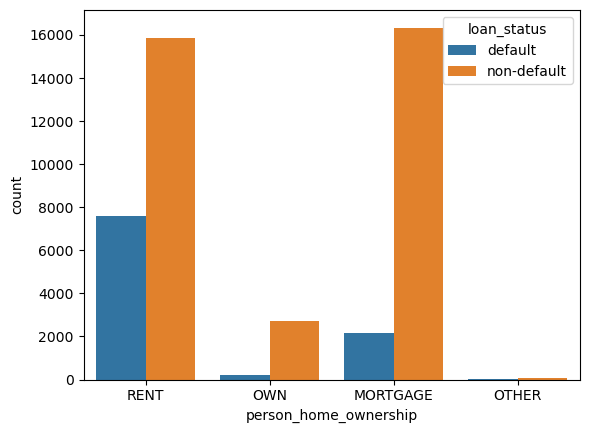

In [287]:
# Comparing home ownership and loan status
sns.countplot(x='person_home_ownership', hue='loan_status', data=df)

In [288]:
ct = pd.crosstab(df['person_home_ownership'], df['loan_status'])
ct['default_rate'] = ct['default'] / (ct['non-default'] + ct['default']) * 100
ct

loan_status,default,non-default,default_rate
person_home_ownership,,,
MORTGAGE,2144,16341,11.598593
OTHER,39,78,33.333333
OWN,222,2729,7.522874
RENT,7595,15845,32.401877


The chart shows `RENT` and `MORTGAGE` having the highest count of defaulters with `7595` and `2144` respectively, `OTHER` having the least with `39` in this group of home ownership, with `RENT` defaulting more than `MORGAGE`.
Like the chart shows, `RENT` has the highest default rate at `32.4$`. `MORTGAGE` has a default rate of `11.6$`. `OTHER` has a default rate of `33.3$` however its total count is `117`

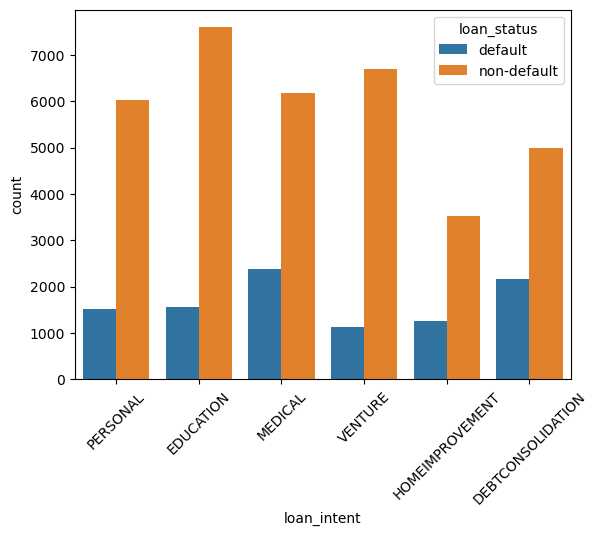

In [289]:
# comparing loan intent and loan status
sns.countplot(x='loan_intent', hue='loan_status', data=df)
plt.xticks(rotation=45)
plt.show()

In [290]:
ct = pd.crosstab(df['loan_intent'], df['loan_status'])
ct['default_rate'] = ct['default'] / (ct['non-default'] + ct['default']) * 100
ct

loan_status,default,non-default,default_rate
loan_intent,,,
DEBTCONSOLIDATION,2163,4982,30.272918
EDUCATION,1552,7599,16.959895
HOMEIMPROVEMENT,1258,3525,26.301484
MEDICAL,2378,6170,27.819373
PERSONAL,1521,6030,20.143027
VENTURE,1128,6687,14.433781


The chart shows `EDUCATION` having the most count of loan intend, followed by `VENTURE`, and then `MEDICAL`and `PERSONAL` with similar counts. The least being `HOMEIMPROVENT`.
`MEDICAL` has the most count of defaulters with `2378`(`27.81%`), followed by `DEBTCONSOLIDATION`with `2163`(`30.27%`)
`DEBTCONSOLIDATION`, which has the fifth least count, has the highest figure of default rate at `30.27%`.  `VENTURE` and `EDUCATION` have the least rates of loan defaults at `14.43%` and `16.96%` respectively.

<Axes: xlabel='previous_loan_defaults_on_file', ylabel='count'>

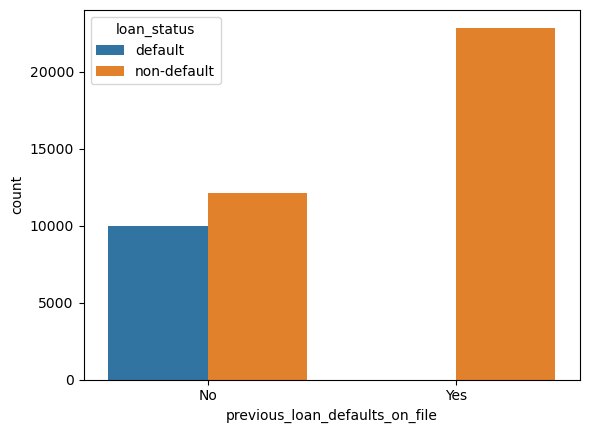

In [291]:
sns.countplot(x='previous_loan_defaults_on_file', hue='loan_status', data=df)

In [292]:
ct = pd.crosstab(df['previous_loan_defaults_on_file'], df['loan_status'])
ct['default_rate'] = ct['default'] / (ct['non-default'] + ct['default']) * 100
ct

loan_status,default,non-default,default_rate
previous_loan_defaults_on_file,,,
No,10000,12137,45.173239
Yes,0,22856,0.000000


This chart shows that a high number of individuals with previous defaults (`45.17%`) defaulted again.
Interestingly, none of the individuals in this dataframe(`22856`) with a previous loan default defaulted again.

In [293]:
# Reversing the loan_status mapping
df['loan_status'] = df['loan_status'].map({'default' : 1, 'non-default' : 0})
df['loan_status']

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 44993, dtype: int64

In [294]:
# label encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat.columns:
    df[col] = le.fit_transform(df[col])
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


# Model Building

Naive Bayes Model

In [295]:
# Assigning variables
y = df['loan_status'] # target
X = df.drop('loan_status', axis = 1) # predictor

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=5826)

In [296]:
# scaler function
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train) # fit scaler to training model
X_train = scaler.transform(X_train) # scale training data
X_test = scaler.transform(X_test) # scale test data

In [297]:
# fitting the data to Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [298]:
# model accuracy
acc = accuracy_score(y_test, y_pred)
print('Model accuracy is: ' '%.4f' % acc)

Model accuracy is: 0.7307


In [299]:
# Classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.66      0.79     10498
           1       0.45      1.00      0.62      3000

    accuracy                           0.73     13498
   macro avg       0.72      0.83      0.71     13498
weighted avg       0.88      0.73      0.75     13498



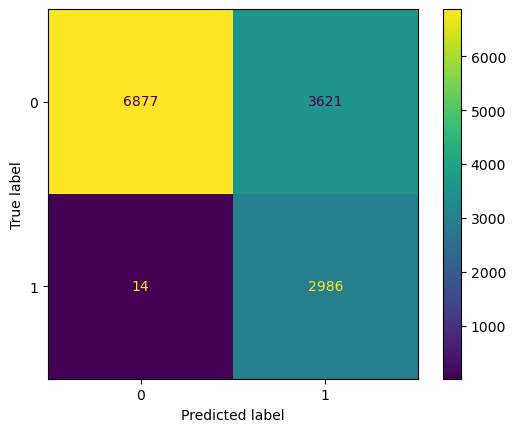

In [308]:
# Confusion matrix
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(y_test,y_pred,labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model.classes_)
disp.plot()